Logistic Regression with 94% accuracy. Uses TF-IDF WE technique over the 4 lexical features. 20% testing data.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [10]:
# Load your preprocessed dataset (replace 'your_preprocessed_dataset.csv' with your actual file path)
df = pd.read_csv('/Users/ellen/OneDrive/Documents/Python/archive/WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
df.fillna(' ')

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [13]:
# Function for additional text cleaning
def clean_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Example: Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ''  # Return an empty string for non-string values

# Apply additional text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

In [14]:
# Feature extraction: TF-IDF for unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = vectorizer.fit_transform(df['cleaned_text'])

In [16]:
# Feature extraction: Lexical features
df['word_count'] = df['cleaned_text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))
# Calculate average word length, handling division by zero
df['average_word_length'] = df.apply(lambda row: 
                                     sum(len(word) for word in word_tokenize(row['cleaned_text'])) / len(word_tokenize(row['cleaned_text']))
                                     if len(word_tokenize(row['cleaned_text'])) > 0 else 0, axis=1)

In [21]:
# Additional features
df['article_length'] = df['cleaned_text'].apply(len)  # Length of the article
df['number_count'] = df['cleaned_text'].apply(lambda x: len(re.findall(r'\b\d+\b', x)))  # Number count


In [25]:
# Combine TF-IDF features and lexical features
X_combined = pd.concat([pd.DataFrame(X_tfidf.toarray()), df[['word_count', 'average_word_length', 'article_length', 'number_count']]], axis=1)

In [30]:
# Convert column names to strings
X_combined.columns = X_combined.columns.astype(str)

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['label'], test_size=0.2, random_state=42)

In [37]:
# Initialize and train logistic regression model with increased max_iter and specify solver
model = LogisticRegression(solver='lbfgs', max_iter=1000)  # You can adjust the values based on your needs
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [40]:
# Predictions
predicted = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, predicted)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, predicted, average='binary')
conf_matrix = confusion_matrix(y_test, predicted)


# Evaluate the model
print(classification_report(y_test, predicted))
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", round(accuracy * 100), '%')
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7089
           1       0.94      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427

Accuracy: 94 %
Accuracy: 0.9399736604976779


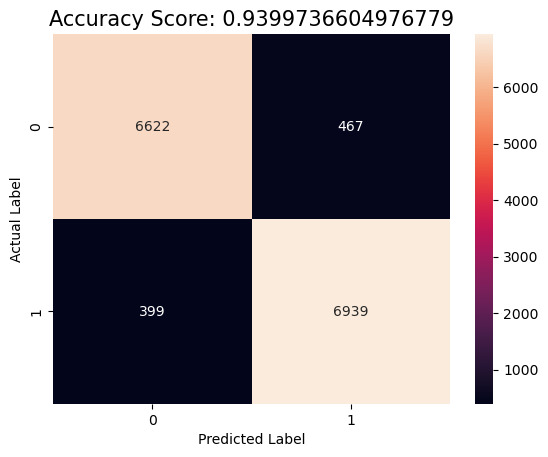

In [41]:
cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot = True, fmt = '')
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
# plt.title('Confusion Matrix')
all_sample_title  = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);
plt.show()